In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv("lucene-2.9.0_final_merged_features_normalized.csv")

In [6]:
data.shape

(1368, 3861)

In [7]:
# Filter the data for each label
data_label_1 = data[data['Bug'] == 1].drop(columns=["Bug"])
data_label_0 = data[data['Bug'] == 0].drop(columns=["Bug"])

# Calculate mean and variance for Label 1
mean_label_1 = data_label_1.mean()
var_label_1 = data_label_1.var()

# Calculate mean and variance for Label 0
mean_label_0 = data_label_0.mean()
var_label_0 = data_label_0.var()

# Create a new DataFrame for the result
result = pd.DataFrame([mean_label_1, var_label_1, mean_label_0, var_label_0],
                      index=['Mean_Label_1', 'Variance_Label_1', 'Mean_Label_0', 'Variance_Label_0'])

# Print or save the result
result

,loc,sloc,num_comments,comment_density,num_blank_lines,num_tokens,num_unique_tokens,avg_line_length,code_length,num_functions,...,xlnet-base-cased_feature_758,xlnet-base-cased_feature_759,xlnet-base-cased_feature_760,xlnet-base-cased_feature_761,xlnet-base-cased_feature_762,xlnet-base-cased_feature_763,xlnet-base-cased_feature_764,xlnet-base-cased_feature_765,xlnet-base-cased_feature_766,xlnet-base-cased_feature_767
Mean_Label_1,0.518673,0.440780,0.223827,0.141639,0.633992,0.502776,0.673646,0.314418,0.606598,0.560289,...,0.102741,-0.445572,0.205427,-0.277224,0.677450,-0.570435,0.167206,0.155143,-0.430293,-0.088813
Variance_Label_1,4.868524,3.657213,1.253447,1.111425,6.375863,3.784929,3.149815,1.272345,5.296021,4.572371,...,0.723051,0.618493,0.327605,0.507131,0.878572,0.841159,0.436249,0.400107,0.770736,0.299086
Mean_Label_0,-0.047604,-0.040455,-0.020543,-0.013000,-0.058188,-0.046145,-0.061827,-0.028857,-0.055673,-0.051423,...,-0.009430,0.040894,-0.018854,0.025444,-0.062176,0.052354,-0.015346,-0.014239,0.039492,0.008151
Variance_Label_0,0.622373,0.740163,0.973496,0.989440,0.471794,0.722668,0.760339,0.966885,0.573526,0.644836,...,1.025756,1.016426,1.058590,1.038768,0.966630,0.983429,1.050126,1.053807,1.003905,1.064628


In [8]:
data.drop(columns=["Bug"], inplace=True)

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [11]:
k_values = range(2, 10)

# Initialize a DataFrame to store the one-hot encoded vectors
one_hot_encoded = pd.DataFrame(index=data.columns, columns=k_values)

# Initialize a DataFrame to store cluster labels
cluster_labels = pd.DataFrame(index=data.columns, columns=k_values, dtype=int)

# Perform clustering and generate one-hot encoded vectors
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.T)
    
    # Store cluster labels
    cluster_labels[k] = kmeans.labels_

    # Generate one-hot encoded vectors
    encoder = OneHotEncoder(categories=[range(k)], sparse_output=False, dtype=int)
    one_hot_encoded_vectors = encoder.fit_transform(kmeans.labels_.reshape(-1, 1))
    
    # Create a DataFrame with one-hot encoded vectors
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_vectors, index=data.columns, columns=[f'{k}_cluster_{i}' for i in range(k)])
    # Update the one-hot encoded DataFrame
    one_hot_encoded = pd.concat([one_hot_encoded, one_hot_encoded_df], axis=1, join='inner')

# Calculate mean and variance of cluster assignments
# mean_variance = cluster_labels.apply([np.mean, np.var], axis=1)
# Combine one-hot encoded vectors with mean and variance
final_output = pd.concat([one_hot_encoded, result.T], axis=1)
final_output.drop(columns=np.arange(2,10), inplace=True)
# Rename columns to include 'k_' prefix for cluster labels

clustered_data = final_output
embedding_size = 48

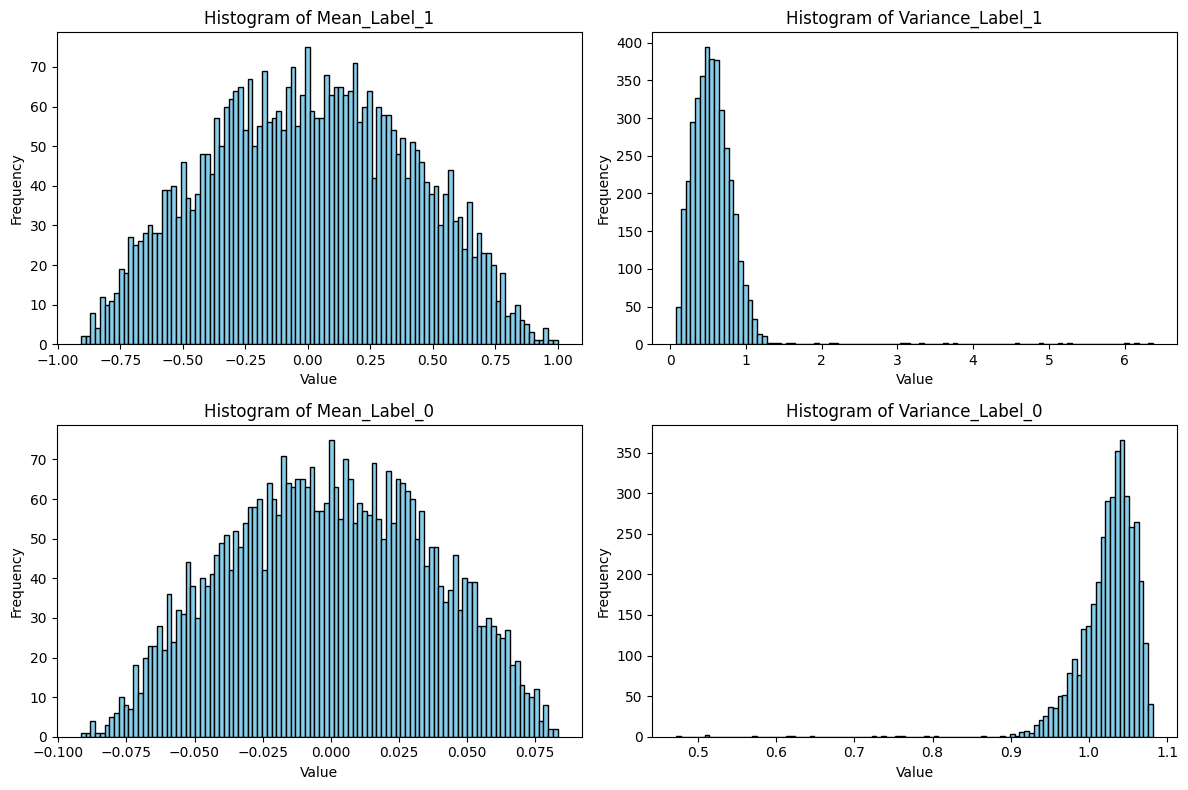

In [12]:
import matplotlib.pyplot as plt

# Plotting histograms for each row
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easier access
axs = axs.flatten()

# Plot each row as a histogram
for i, (row_name, row_data) in enumerate(result.iterrows()):
    axs[i].hist(row_data, bins=100, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {row_name}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming the dataset is loaded in a DataFrame called 'df'
df = pd.read_csv('lucene-2.9.0_final_merged_features_normalized.csv')

# Step 1: Split the dataset by label
df_label_1 = df[df['Bug'] == 1].drop(columns=['Bug'])
df_label_0 = df[df['Bug'] == 0].drop(columns=['Bug'])

# Step 2: Calculate the correlation matrix for both subsets
corr_matrix_label_1 = df_label_1.corr().abs()  # Absolute Pearson correlation for label = 1
corr_matrix_label_0 = df_label_0.corr().abs()  # Absolute Pearson correlation for label = 0

# Step 3: Create upper triangle matrices for both correlation matrices
upper_triangle_label_1 = np.triu(corr_matrix_label_1, k=1)
upper_triangle_label_0 = np.triu(corr_matrix_label_0, k=1)
# Plot for label = 1
# plt.figure(figsize=(10, 8))
# sns.heatmap(upper_triangle_label_1, cmap='coolwarm', annot=False)
# plt.title('Correlation Matrix for Label = 1')
# plt.show()

# # Plot for label = 0
# plt.figure(figsize=(10, 8))
# sns.heatmap(upper_triangle_label_0, cmap='coolwarm', annot=False)
# plt.title('Correlation Matrix for Label = 0')
# plt.show()
# Step 4: Define a threshold for correlation
threshold = 0.90

# Step 5: Identify highly correlated columns in both groups
columns_to_drop = []
for column in corr_matrix_label_1.columns:
    corr_1_high = any(upper_triangle_label_1[:, corr_matrix_label_1.columns.get_loc(column)] > threshold)
    corr_0_high = any(upper_triangle_label_0[:, corr_matrix_label_0.columns.get_loc(column)] > threshold)
    
    # Only drop the column if it is highly correlated in both label groups
    if corr_1_high and corr_0_high:
        columns_to_drop.append(column)

# Step 6: Drop the redundant columns from the original dataset
df_reduced = df.drop(columns=columns_to_drop)

# Print the number of columns before and after
print(f"Original number of columns: {df.shape[1]}")
print(f"Reduced number of columns: {df_reduced.shape[1]}")


Original number of columns: 3861
Reduced number of columns: 3831


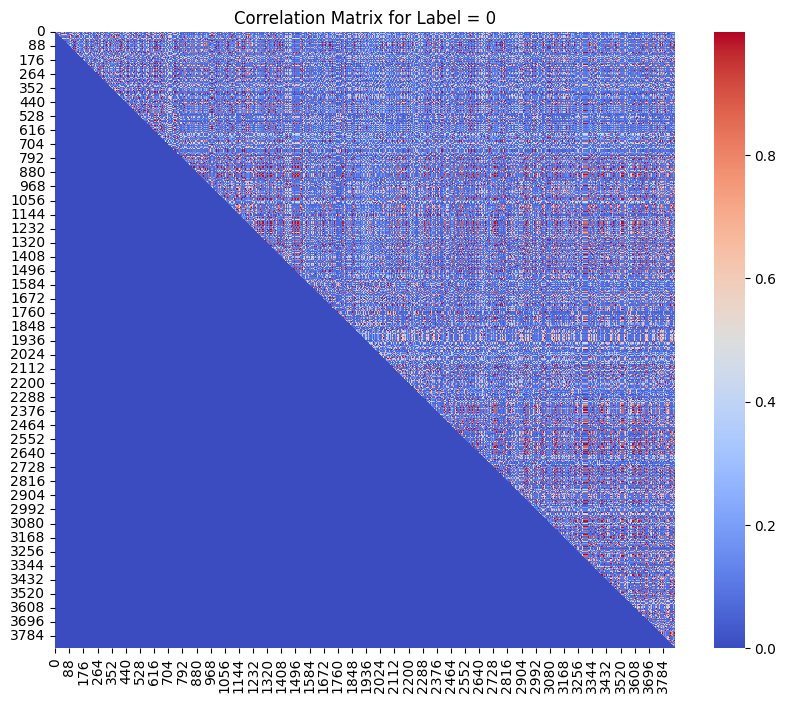

Original number of columns: 3860
Reduced number of columns: 236


In [17]:
import numpy as np
import pandas as pd

# Load your dataset
# Assuming the dataset is loaded in a DataFrame called 'df'
# df = pd.read_csv('your_dataset.csv')
df = final_output.T

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr().abs()  # Use absolute values of correlations

# Step 2: Create an upper triangle matrix of the correlation matrix
upper_triangle = np.triu(corr_matrix, k=1)
plt.figure(figsize=(10, 8))
sns.heatmap(upper_triangle, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix for Label = 0')
plt.show()
# Step 3: Identify highly correlated columns
threshold = 0.95
to_drop = [column for column in corr_matrix.columns if any(upper_triangle[:, corr_matrix.columns.get_loc(column)] > threshold)]

# Step 4: Drop the redundant columns
df_reduced = df.drop(columns=to_drop)

# Print the number of columns before and after
print(f"Original number of columns: {df.shape[1]}")
print(f"Reduced number of columns: {df_reduced.shape[1]}")


In [16]:
df_reduced.T

,2_cluster_0,2_cluster_1,3_cluster_0,3_cluster_1,3_cluster_2,4_cluster_0,4_cluster_1,4_cluster_2,4_cluster_3,5_cluster_0,...,9_cluster_3,9_cluster_4,9_cluster_5,9_cluster_6,9_cluster_7,9_cluster_8,Mean_Label_1,Variance_Label_1,Mean_Label_0,Variance_Label_0
loc,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.518673,4.868524,-0.047604,0.622373
comment_density,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.141639,1.111425,-0.013000,0.989440
avg_line_length,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.314418,1.272345,-0.028857,0.966885
num_interfaces,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.072796,0.999840,0.006681,1.001081
microsoft/codebert-base_feature_0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.217048,0.192680,0.019921,1.070383
microsoft/codebert-base_feature_3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.267478,0.333036,0.024549,1.055153
microsoft/codebert-base_feature_4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.121078,0.301653,-0.011112,1.063715
microsoft/codebert-base_feature_21,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.524625,0.704263,0.048150,1.000924
microsoft/codebert-base_feature_53,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.109433,0.291121,-0.010044,1.064943
microsoft/codebert-base_feature_117,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.011531,0.526987,0.001058,1.044654


In [48]:
df_reduced.columns.to_list()

['microsoft/codebert-base_feature_0',
 'microsoft/codebert-base_feature_1',
 'microsoft/codebert-base_feature_11',
 'microsoft/codebert-base_feature_32',
 'microsoft/codebert-base_feature_42',
 'microsoft/codebert-base_feature_77']

150